<a href="https://colab.research.google.com/github/baileybunch5dad/bb5dad/blob/master/eli6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Derivates, Slope, Pythagorean Formula

Given a known starting point $x_1,x_2$ and a slope $m$ make a line have a length of $c=2$
$$
\begin{aligned}
\frac{y_2-y_1}{x_2-x_1} &= m & x_1,y_1,m \text{ given}\\
c &= 2 & c\text{ given}\\
\left( \frac{y_2-y_1}{x_2-x_1} \right)^2 &= m^2 & \text{from 1}\\
(y_2-y_1)^2 &= m^2(x_2-x_1)^2 & \text{eq A}  \\
a^2 + b^2 &= c^2 \\
(x_1,y_1) &= \text{start of hypotenuse} \\
(x_2,y_2) &= \text{end of hypotenuse} \\
a &= x_2 - x_1 \\
b &= y_2 - y_1 \\
c &= \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2} \\
2 &= \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2} \\
4 &= (x_2-x_1)^2 + (y_1-y_1)^2 \\
4 &=  (x_2-x_1)^2 + m^2(x_2-x_1)^2 & \text{from eq A} \\
4 &= (m^2 +1 )(x_2-x_1)^2 \\
\frac{4}{(m^2+1)} &= (x_2-x_1)^2 \\
\sqrt{\frac{4}{(m^2+1)}} &= x_2-x_1 \\
x_2 &= \frac{2}{\sqrt{m^2+1}} + x1 \\
y_2 &= m(x_1-x_2) + y1 \\
\end{aligned}
$$

## Show that it works,length is consistent regardless of slope

[ 3.    3.    3.63  1.1   2.37  4.9  -3.  ]
[ 3.    3.    3.89  1.21  2.11  4.79 -2.  ]
[ 3.    3.    4.41  1.59  1.59  4.41 -1.  ]
[3. 3. 5. 3. 1. 3. 0.]
[3.   3.   4.41 4.41 1.59 1.59 1.  ]
[3.   3.   3.89 4.79 2.11 1.21 2.  ]
[3.   3.   3.63 4.9  2.37 1.1  3.  ]


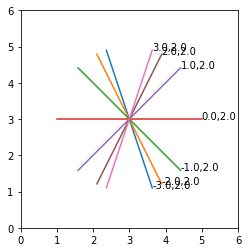

In [45]:
from matplotlib import pyplot as plt
import numpy as np
# draw a line 2 units long independent of its slope
slopes = np.linspace(-3, 3, 7)
x1 = 3
y1 = 3
plt.xlim(0,6)
plt.ylim(0,6)
for m in slopes:
  x2 = 2/np.sqrt(m*m+1)+x1
  y2 = m*(x2-x1)+y1
  x1a = x1-(x2-x1)
  y1a = 2*y1 - y2
  print(np.round(np.array([x1,y1,x2,y2,x1a,y1a,m]),2))
  slen=np.sqrt((x2-x1)*(x2-x1)+(y2-y1)*(y2-y1))
  plt.plot([x1a,x2],[y1a,y2])
  plt.text(x2,y2,str(round(m,2))+','+str(round(slen,2)))
plt.gca().set_aspect('equal')
plt.show()  

## Add perpendicular lines with slope $-1/m$

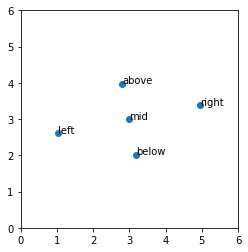

In [46]:
def right(linelength, x1, y1, m):
  x2 = linelength/np.sqrt(m*m+1)+x1
  y2 = m*(x2-x1)+y1
  return x2, y2

def left(linelength, x1, y1, m):
  rightx, righty = right(linelength, x1, y1, m)
  lx = 2*x1 - rightx
  ly = 2*y1 - righty
  return lx, ly
  
def above(linelength, x1, y1, m): 
  if m==0:
    x2=x1
    y2=y1+linelength
  else:
    perpslope = -1/m
    if perpslope < 0:
      x2, y2 = left(linelength, x1, y1, perpslope)
    else:
      x2, y2 = right(linelength, x1, y1, perpslope)
  return x2, y2

def below(linelength, x1, y1, m): 
  ax, ay = above(linelength, x1, y1, m)
  bx, by = 2*x1-ax, 2*y1-ay
  return bx, by

xmid, ymid = 3, 3
m=1/5
llen=2
xright, yright = right(llen, xmid, ymid, m)
xleft, yleft = left(llen, xmid, ymid, m)
xabove, yabove = above(llen-1, xmid, ymid, m)
xbelow, ybelow = below(llen-1, xmid, ymid, m)
plt.xlim(0,6)
plt.ylim(0,6)
plt.scatter([xleft,xmid,xright,xabove,xbelow], [yleft, ymid, yright, yabove, ybelow])
plt.text(xleft, yleft, 'left')
plt.text(xmid, ymid, 'mid')
plt.text(xright, yright, 'right')
plt.text(xabove, yabove, 'above')
plt.text(xbelow, ybelow, 'below')
plt.gca().set_aspect('equal')
plt.show()


## Use the compute points which form a pattern

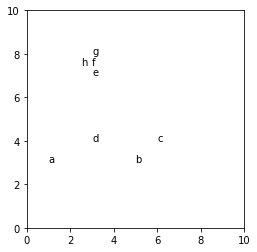

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
import string

def flipside(p0,p1): return [2*p0[0]-p1[0], 2*p0[1]-p1[1]]
    
def right(p, m, llen): 
  # print('p',p,m,llen)
  t=llen/np.sqrt(m*m+1)+p[0]
  # print('t',t,'p[0]',p[0])
  return [t, m*(t-p[0])+p[1]]
  
def left(p, m, llen): return flipside(p, right(p, m, llen))
  
def above(p, m, llen):
  if m==0:
    return [p[0], p[1]+llen]
  else:
    perp = -1/m
    if perp < 0:
      return left(p, perp, llen)
    else:
      return right(p, perp, llen)

def below(p, m, llen): return flipside(above(p, m, llen))

def boatpath(p, m):
  a = left(p,m,2)
  b = right(p,m,2)
  d = above(p,m,1)
  c = right(d,m,3)
  e = above(d,m,3)
  f = above(e,m,.5)
  g = above(f,m,.5)
  h = left(f,m,.5)
  i = left(d,m,3)
  return np.array([a,b,c,d,e,f,g,h,e,d,i,a])

plt.xlim(0,10)
plt.ylim(0,10)

bptest = boatpath([3,3],0)
# alphabet_list = list(string.ascii_lowercase)
for idx in range(8):
  plt.text(bptest[idx,0], bptest[idx,1], alphabet_list[idx])  

# plt.plot(bptest[:,0],bptest[:,1])
# plt.scatter(bptest[:,0],bptest[:,1])
plt.gca().set_aspect('equal')
plt.show()


## Compute the pattern over ranging $x$

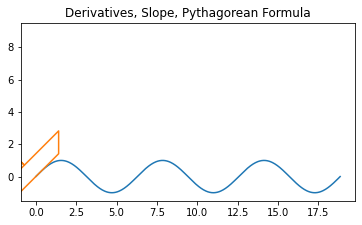

In [48]:

fig, ax = plt.subplots()

ax.set_title('Derivatives, Slope, Pythagorean Formula')
x = np.linspace(0, 6*np.pi, 500)
line1, = ax.plot(x, np.sin(x))
bp = boatpath([5,4],0)
line2, = ax.plot(bp[:,0], bp[:,1])
ax.set_aspect('equal')
lines = list([line1,line2]) 

def animate(i):
  ix = i % 500
  x1 = x[ix]
  y1 = np.sin(x1)
  m = np.cos(x1)
  p = np.array([x1,y1])
  bp = boatpath(p, m)
  line2.set_xdata(bp[:,0])
  line2.set_ydata(bp[:,1])
  return lines

ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=500)

plt.show()

## Animate the pattern

In [49]:
from IPython.display import HTML
HTML(ani.to_html5_video())